<a href="https://colab.research.google.com/github/remeantown/lab/blob/main/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving final_wheat_data.csv to final_wheat_data.csv


In [ ]:
import pandas as pd

df = pd.read_csv('final_wheat_data.csv')

print("Первые 12 строк данных:")
print(df.head(15))

Первые 12 строк данных:
   commodity                   category                    item  \
0      Wheat  Gross value of production  Primary product, grain   
1      Wheat  Gross value of production  Primary product, grain   
2      Wheat  Gross value of production  Primary product, grain   
3      Wheat  Gross value of production  Primary product, grain   
4      Wheat  Gross value of production  Primary product, grain   
5      Wheat  Gross value of production  Primary product, grain   
6      Wheat  Gross value of production  Primary product, grain   
7      Wheat  Gross value of production  Primary product, grain   
8      Wheat  Gross value of production  Primary product, grain   
9      Wheat  Gross value of production  Primary product, grain   
10     Wheat  Gross value of production  Primary product, grain   
11     Wheat  Gross value of production  Primary product, grain   
12     Wheat  Gross value of production  Primary product, grain   
13     Wheat  Gross value of productio

In [ ]:
test = df.head(12)
print(test)

   commodity                   category                    item  \
0      Wheat  Gross value of production  Primary product, grain   
1      Wheat  Gross value of production  Primary product, grain   
2      Wheat  Gross value of production  Primary product, grain   
3      Wheat  Gross value of production  Primary product, grain   
4      Wheat  Gross value of production  Primary product, grain   
5      Wheat  Gross value of production  Primary product, grain   
6      Wheat  Gross value of production  Primary product, grain   
7      Wheat  Gross value of production  Primary product, grain   
8      Wheat  Gross value of production  Primary product, grain   
9      Wheat  Gross value of production  Primary product, grain   
10     Wheat  Gross value of production  Primary product, grain   
11     Wheat  Gross value of production  Primary product, grain   

                     item2                     units              size  \
0   Primary product, grain  dollars per planted acre  

In [ ]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['value'] = pd.to_numeric(df['value'], errors='coerce')

text_cols = [
    'commodity', 'category', 'item', 'item2',
    'units', 'size', 'region', 'country', 'survey_base_year'
]

for col in text_cols:
    df[col] = df[col].astype(str).str.strip().str.lower()

print("=== ПРОПУСКИ ===")
print(df.isna().sum())

print("\n=== ДИАПАЗОН ГОДОВ ===")
print(df['year'].min(), "-", df['year'].max())

print("\n=== ОПИСАТЕЛЬНАЯ СТАТИСТИКА ===")
print(df[['year', 'value']].describe())

print("\n=== INFO ===")
df.info()

print("\n=== TOP 10 ROWS ===")
print(df.head(10))

=== ПРОПУСКИ ===
commodity              0
category               0
item                   0
item2                  0
units                  0
size                   0
region                 0
country                0
year                   0
value                  0
survey_base_year       0
note                5385
dtype: int64

=== ДИАПАЗОН ГОДОВ ===
1998 - 2024

=== ОПИСАТЕЛЬНАЯ СТАТИСТИКА ===
              year        value
count  6003.000000  6003.000000
mean   2010.316342    75.708191
std       7.936018   129.087266
min    1998.000000  -196.080000
25%    2003.000000     6.315000
50%    2010.000000    20.920000
75%    2017.000000    95.000000
max    2024.000000   858.000000

=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6003 entries, 0 to 6002
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   commodity         6003 non-null   object 
 1   category          6003 non-null   object 
 2  

In [ ]:
for index, row in df.iterrows():
    year = row['year']
    region = row['region']
    value = row['value']

    print(f"Год: {year}, Регион: {region}, Значение: {value}")

    if index == 9:
        break


Год: 1998, Регион: u.s. total, Значение: 110.95
Год: 1999, Регион: u.s. total, Значение: 95.73
Год: 2000, Регион: u.s. total, Значение: 92.5
Год: 2001, Регион: u.s. total, Значение: 95.22
Год: 2002, Регион: u.s. total, Значение: 91.51
Год: 2003, Регион: u.s. total, Значение: 126.48
Год: 2004, Регион: u.s. total, Значение: 136.91
Год: 2005, Регион: u.s. total, Значение: 126.48
Год: 2006, Регион: u.s. total, Значение: 136.78
Год: 2007, Регион: u.s. total, Значение: 196.35


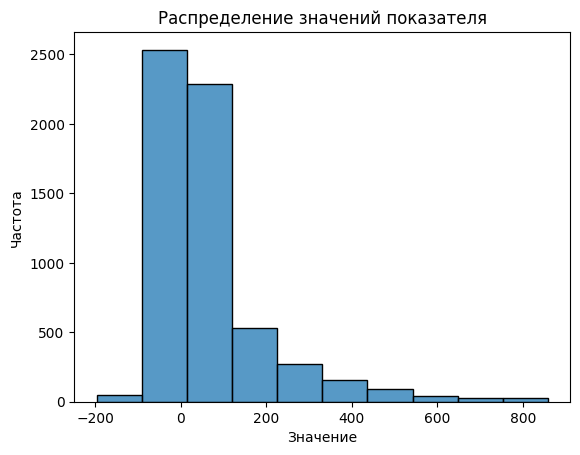

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
sns.histplot(df['value'], bins=10)
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.title('Распределение значений показателя')
plt.show()



In [ ]:
print("— Проверка пропущенных значений в датафрейме —")

missing_values_count = df.isnull().sum()

print("Количество пропущенных значений в каждом столбце:")
print(missing_values_count)

total_missing = missing_values_count.sum()
print(f"Общее количество пропущенных значений в датафрейме: {total_missing}")

print("— Столбцы с пропущенными значениями (если есть) —")
columns_with_missing = missing_values_count[missing_values_count > 0]

if not columns_with_missing.empty:
    print(columns_with_missing)
else:
    print("Пропущенных значений не обнаружено.")


— Проверка пропущенных значений в датафрейме —
Количество пропущенных значений в каждом столбце:
commodity              0
category               0
item                   0
item2                  0
units                  0
size                   0
region                 0
country                0
year                   0
value                  0
survey_base_year       0
note                5385
dtype: int64
Общее количество пропущенных значений в датафрейме: 5385
— Столбцы с пропущенными значениями (если есть) —
note    5385
dtype: int64


In [ ]:
df.to_csv('final_wheat_data_cleaned.csv', index=False, encoding='utf-8')